# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [32]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [33]:
# Read in the data set
df = pd.read_csv("boston.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
df.shape

(506, 14)

In [35]:
# Clean and pre-process the data if neccessary

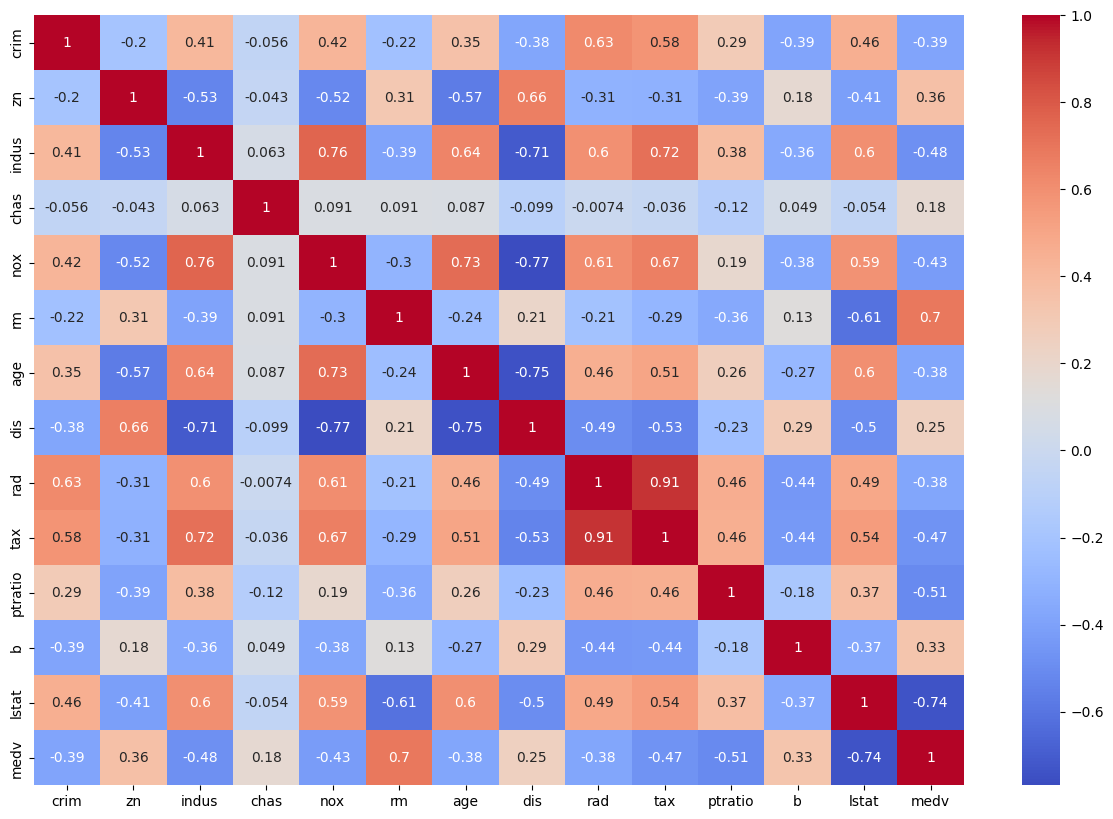

In [36]:
# Explore the data with visualisations such as histograms and correlation matrices
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [37]:
# Split the independent variables from the dependent variable

# independant variables
X = df.iloc[:,[5, 12]].values

# dependant variable
y = df.iloc[:,13].values

# Change shape to 2-dimensional array
X = X.reshape(-1, X.shape[1])
y = y.reshape(-1, 1)

C:\Users\abmsajt\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


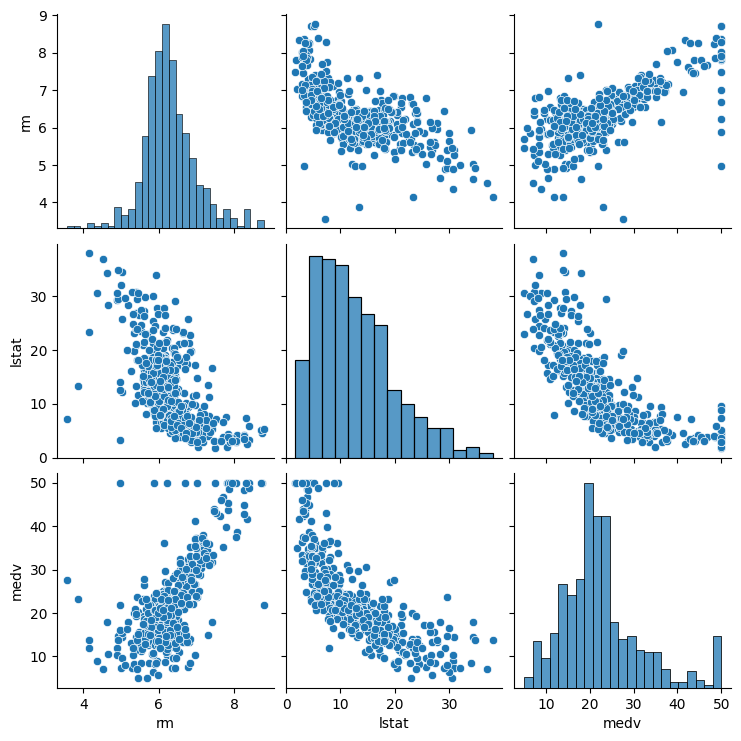

In [38]:
# Explore relationships between the independent and dependent variables
# Create a new variable temp_df.
temp_df = df.iloc[:,[5, 12, 13]]
# Plot the distribution of the data
sns.pairplot(data=temp_df)

In [39]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# Print training and test data
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (379, 2) (379, 1)
Test data: (127, 2) (127, 1)


In [40]:
# Build a multiple linear regression model using 'rm' and 'lstat'

# Load the scaler
sc = MinMaxScaler()
# Fit the scaler on train data
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Load the model
lm = LinearRegression()
# Apply the scaler on train and test data
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
# Print the model intercept and coefficients
print(f"Intercept: \n {lm.intercept_}")
print(f"Coefficients: \n {lm.coef_}")

Intercept: 
 [15.94920846]
Coefficients: 
 [[ 28.20580987 -20.9864966 ]]


In [42]:
# Generate predictions for the test set
predictions = lm.predict(X_test)
predictions[0:5]

array([[22.06584635],
       [20.47900593],
       [21.05705936],
       [23.77529829],
       [20.69134523]])

In [43]:
# Evaluate the model
# calculate the mean squared error
mean_squared_error(y_test, predictions)

27.184061171697998

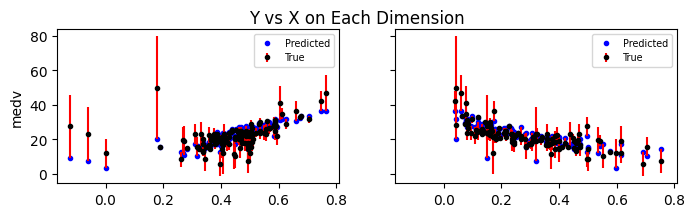

In [44]:
# Generate a plot

## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(df.columns[13])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [45]:
# Print the coefficients
print(f"Coefficients: \n {lm.coef_}")

Coefficients: 
 [[ 28.20580987 -20.9864966 ]]


**Interpret coefficients in the context of the prediction:**

With every unit increase in the average number of rooms per dwelling the predicted outcome is expected to increase median value of owner occupied homes by 28.2 units.

With every unit increase in the percentage of lower status population the predicted outcome is expected to decrease the median value of owner occupied homes by -20.9 units

Provided that the independant variables are zero our model shows us the predicted median value for owner occupied homes is $15000

**Summarise findings**

As the number of rooms increase the Median Value of a home also increases.
The areas that have a higher percentage of lower status population has a lower Median Valeu of homes. 